In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT PACKAGES

In [ ]:
# List files in the current directory (note the "!" to make this a Unix/Linux command)
# If we only see "sample_data" then this is a new instance and we need to do steps 2 and 3 to get/install files
!ls

print("\nWelcome to advanced top sites")

!ls
!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Correct Spark download URL
!wget https://archive.apache.org/dist/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz -O spark-3.4.0-bin-hadoop3.tgz

# Check if the download was successful
import os
if not os.path.exists("spark-3.4.0-bin-hadoop3.tgz"):
    raise Exception("Spark download failed")

!tar -xf spark-3.4.0-bin-hadoop3.tgz

# Check if the extraction was successful
if not os.path.exists("spark-3.4.0-bin-hadoop3"):
    raise Exception("Spark extraction failed")

!ls -alt
print("Standalone Spark is now installed")

# Install findspark if not already installed
!pip3 install findspark

# Set up environment variables for Spark and Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

# Initialize findspark
import findspark
findspark.init()

# Import necessary PySpark modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create a SparkSession
spark = SparkSession.builder.appName("bikes").getOrCreate()

print("Spark session created and ready to use.")

drive  sample_data  spark-3.4.0-bin-hadoop3  spark-3.4.0-bin-hadoop3.tgz

Welcome to advanced top sites
drive  sample_data  spark-3.4.0-bin-hadoop3  spark-3.4.0-bin-hadoop3.tgz
--2024-05-18 08:58:04--  https://archive.apache.org/dist/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388407094 (370M) [application/x-gzip]
Saving to: ‘spark-3.4.0-bin-hadoop3.tgz’

spark-3.4.0-bin-had 100%[===================>] 370.41M  26.2MB/s    in 15s     

2024-05-18 08:58:20 (24.6 MB/s) - ‘spark-3.4.0-bin-hadoop3.tgz’ saved [388407094/388407094]

total 379332
drwxr-xr-x  1 root root      4096 May 18 08:58 .
drwx------  5 root root      4096 May 18 03:23 drive
drwxr-xr-x  1 root root      4096 May 18 03:21 ..
drwxr-xr-x  1 root root      4096 May 16 13:24 sample_data
drwxr-xr-x

# Comments
1. This is loading of the packages required to accomplish the task.

# DATASET LOADING

In [ ]:
from pyspark.sql import SparkSession
import zipfile
import os

# Create a Spark session
spark = SparkSession.builder.appName("ExtractAndCheckSchema").getOrCreate()

# Specify the path to the ZIP file
zip_file_path = "/content/drive/MyDrive/new_bike_ride/zipped_file/cyclehireusagestats-2014 (1).zip"

# Specify the path to the output directory where CSV files will be extracted
output_directory = "/content/drive/MyDrive/new_bike_ride/extract_file"

# Create the output directory if it does not exist
os.makedirs(output_directory, exist_ok=True)

# Check if the output directory is empty
if not os.listdir(output_directory):
    # Extract the ZIP file if the directory is empty
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_directory)
else:
    print("CSV files already exist in the output directory. No extraction performed.")

# List all CSV files in the output directory
csv_files = [os.path.join(output_directory, file) for file in os.listdir(output_directory) if file.endswith(".csv")]

# Stop the Spark session
spark.stop()

csv_files

CSV files already exist in the output directory. No extraction performed.


['/content/drive/MyDrive/new_bike_ride/extract_file/10a. Journey Data Extract 14Sep14-27Sep14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/10b. Journey Data Extract 28Sep14-11Oct14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/11a. Journey Data Extract 12Oct14-08Nov14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/11b. Journey Data Extract 12Oct14-08Nov14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/12a. Journey Data Extract 09Nov14-06Dec14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/12b. Journey Data Extract 09Nov14-06Dec14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/13a. Journey Data Extract 07Dec14-21Dec14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/13b. Journey Data Extract 22Dec14-03Jan15.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/14. Journey Data Extract 08Dec13-04Jan14.csv',
 '/content/drive/MyDrive/new_bike_ride/extract_file/2. Journey Data Extract 03Feb14-01Mar14.csv',
 '/

# Observations
1. The zipped file contains 20 csv files saved as monthl bike rides from year 2013 to 2015.


 # SCHEMA VERIFICATION

In [ ]:
from pyspark.sql import SparkSession
import os

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Check Schema of Extracted Files") \
    .getOrCreate()

# Define the folder containing the extracted files
folder_path = "/content/drive/MyDrive/new_bike_ride/extract_file"

# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

# Loop through each file and check the schema
for file_path in file_list:
    # Read file into DataFrame
    df = spark.read.format("csv").option("header", "true").load(file_path)  # Change format and options if needed

    # Print the schema
    print(f"Schema for file {file_path}:")
    df.printSchema()

Schema for file /content/drive/MyDrive/new_bike_ride/extract_file/10a. Journey Data Extract 14Sep14-27Sep14.csv:
root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)

Schema for file /content/drive/MyDrive/new_bike_ride/extract_file/10b. Journey Data Extract 28Sep14-11Oct14.csv:
root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (

# Observations
 SCHEMA
 1. Sixteen (16 ) out of the Twenty(20) files has the same Schema , while the remainder do not. These need to be removed in order to be able to merge the files appropriately
 Informative Schemas are:
 2. Rental Id: string (nullable = true)-
 |-- Duration: string (nullable = true)-Should be integer
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
3. Non-informative schemas are:
      c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
They will be deleted so as to unified all the files into a single dataframe


# ROW COUNT CHECKING

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import os
import pandas as pd

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Check Schema of Extracted Files") \
    .getOrCreate()

# Define the folder containing the extracted files
folder_path = "/content/drive/MyDrive/new_bike_ride/extract_file"

# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

# Initialize lists to store results
file_paths = []
row_counts = []


# Loop through each file and check the schema
for file_path in file_list:
    # Read file into DataFrame
    df = spark.read.format("csv").option("header", "true").load(file_path)  # Change format and options if needed

    # Collect file path
    file_paths.append(file_path)

    # Collect row count
    row_counts.append(df.count())



# Stop SparkSession
spark.stop()

# Create a Pandas DataFrame
data = {
    'File Path': file_paths,
    'Row Count': row_counts,

}
df_pandas = pd.DataFrame(data)

# Print the Pandas DataFrame
print(df_pandas)

                                            File Path  Row Count
0   /content/drive/MyDrive/new_bike_ride/extract_f...     488627
1   /content/drive/MyDrive/new_bike_ride/extract_f...     919009
2   /content/drive/MyDrive/new_bike_ride/extract_f...     399999
3   /content/drive/MyDrive/new_bike_ride/extract_f...     363005
4   /content/drive/MyDrive/new_bike_ride/extract_f...     339479
5   /content/drive/MyDrive/new_bike_ride/extract_f...     305659
6   /content/drive/MyDrive/new_bike_ride/extract_f...     298350
7   /content/drive/MyDrive/new_bike_ride/extract_f...     472735
8   /content/drive/MyDrive/new_bike_ride/extract_f...     355004
9   /content/drive/MyDrive/new_bike_ride/extract_f...     521161
10  /content/drive/MyDrive/new_bike_ride/extract_f...     729984
11  /content/drive/MyDrive/new_bike_ride/extract_f...     651974
12  /content/drive/MyDrive/new_bike_ride/extract_f...     849196
13  /content/drive/MyDrive/new_bike_ride/extract_f...     914892
14  /content/drive/MyDriv

#Observations
1. There are 11,249,221 rows of data information to processed.

# Merge all the files together , drop the extra schema

# This code includes:

Importing necessary modules.
Creating a SparkSession.
Dropping the extra columns (_c9, _c10, _c11) from file2 and saving it temporarily.
Loading all files including the modified files with extra schemas dropped.
Saving the combined DataFrame as .....   into the output folder.


# MERGE ALL THE FILES TOGETHER

In [ ]:
import os
from pyspark.sql import SparkSession

# File path for locating the files
file_path = "/content/drive/MyDrive/new_bike_ride/extract_file"

# Define the filenames
file_names = [
    "3. Journey Data Extract 02Mar14-31Mar14.csv",
    "4. Journey Data Extract 01Apr14-26Apr14.csv",
    "5. Journey Data Extract 27Apr14-24May14.csv",
    "1. Journey Data Extract 05Jan14-02Feb14.csv",
    "13b. Journey Data Extract 22Dec14-03Jan15.csv",
    "2. Journey Data Extract 03Feb14-01Mar14.csv",
    "13a. Journey Data Extract 07Dec14-21Dec14.csv",
    "14. Journey Data Extract 08Dec13-04Jan14.csv",
    "7. Journey Data Extract 22Jun14-19Jul14.csv",
    "6. Journey Data Extract 25May14-21Jun14.csv",
    "8b Journey Data Extract 01Aug14-16Aug14.csv",
    "8a Journey Data Extract 20Jul14-31Jul14.csv",
    "9a Journey Data Extract 17Aug14-31Aug14.csv",
    "9b Journey Data Extract 01Sep14-13Sep14.csv",
    "10b. Journey Data Extract 28Sep14-11Oct14.csv",
    "10a. Journey Data Extract 14Sep14-27Sep14.csv",
    "11a. Journey Data Extract 12Oct14-08Nov14.csv",
    "11b. Journey Data Extract 12Oct14-08Nov14.csv",
    "12a. Journey Data Extract 09Nov14-06Dec14.csv",
    "12b. Journey Data Extract 09Nov14-06Dec14.csv"
]

# Create file paths
file_paths = [os.path.join(file_path, file_name) for file_name in file_names]

# Create a Spark session
spark = SparkSession.builder.appName("AllBikesRides").getOrCreate()

# Define a function to load and process files
def load_and_drop(file):
    try:
        df = (
            spark.read.format("csv")
            .option("header", "true")
            .option("inferSchema", "true")
            .load(file)
            .drop("_c9", "_c10", "_c11")
        )
        return df
    except Exception as e:
        print(f"Error loading file {file}: {e}")
        return None

# Load, process, and union all files only if the DataFrame does not exist
bike_rides_df = None
for file_path in file_paths:
    df = load_and_drop(file_path)
    if df is not None:
        if bike_rides_df is None:
            bike_rides_df = df
        else:
            bike_rides_df = bike_rides_df.union(df)

if bike_rides_df:
    # Collect row count
    row_count = bike_rides_df.count()
    print(f"Total Row Count: {row_count}")
    # Show the first 5 rows of the DataFrame
    bike_rides_df.show(5)
else:
    print("No valid data was loaded.")

Total Row Count: 11249221
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 30845679|    1380|   6523|03/03/2014 23:27|          695|Islington Green, ...|03/03/2014 23:04|            311|Foley Street, Fit...|
| 30947961|    1500|   2295|07/03/2014 23:31|           93|Cloudesley Road, ...|07/03/2014 23:06|             81|Great Titchfield ...|
| 31120887|    1440|   5829|13/03/2014 22:36|          695|Islington Green, ...|13/03/2014 22:12|            311|Foley Street, Fit...|
| 31150579|    1380|   7395|14/03/2014 22:29|          695|Islington Green, ...|14/03/2014 22:06|            357|Howland Street, F...|
| 31248177|    1440|  11260|1

#Comments
1. Merging the files, the total rows summed up to 11,249,221 rows.
2. Here onward, I will investigate if there are missing vlues, 'Zeros' or 'negatives' values , duplicates and null values in the dataset.
3. If there are, they are deemed as outliers and need to be removed so as to prevent our data from being skewed.

# DATA DESCRIPTION

In [ ]:
import matplotlib.pyplot as plt


Descriptive Statistics:
+-------+-------------------+------------------+------------------+----------------+------------------+--------------------+----------------+-----------------+--------------------+
|summary|          Rental Id|          Duration|           Bike Id|        End Date|     EndStation Id|     EndStation Name|      Start Date|  StartStation Id|   StartStation Name|
+-------+-------------------+------------------+------------------+----------------+------------------+--------------------+----------------+-----------------+--------------------+
|  count|           10010108|          10010108|          10010108|        10010108|          10009979|            10009979|        10010107|         10010107|            10010107|
|   mean|3.497555825277999E7|1460.8190141405069| 6715.252771298771|            null|320.66525144558244|                null|            null|321.2493727589525|                null|
| stddev|   3116720.13268028|12829.874811612073|3722.6313385007634|   

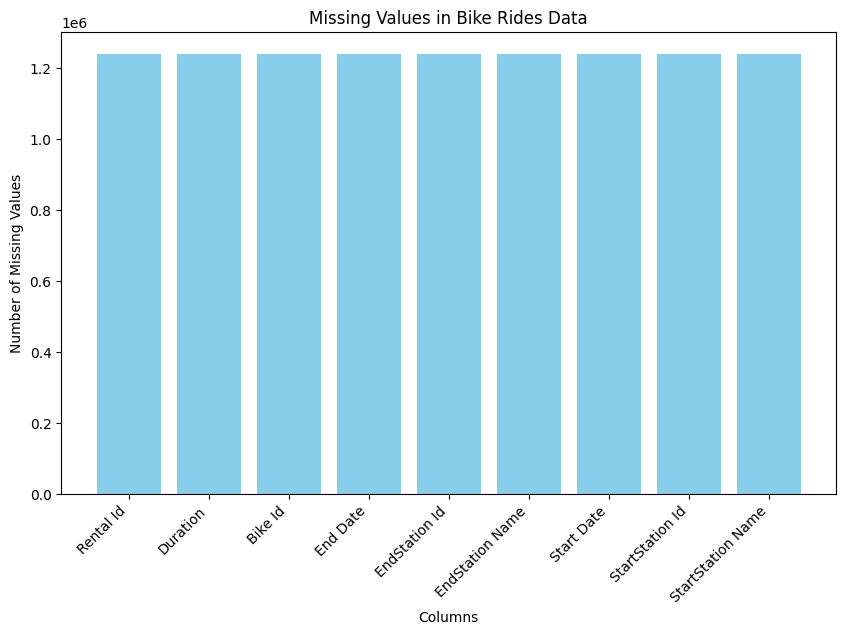

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
bike_rides_df.describe().show()
# Missing values
print("\nMissing Values:")
bike_rides_df.select([count(when(col(c).isNull(), c)).alias(c) for c in bike_rides_df.columns]).show()

# Check for missing values in each column
missing_values_counts = bike_rides_df.select([count(when(isnull(c), c)).alias(c) for c in bike_rides_df.columns]).collect()[0]

# Get column names and missing values counts
columns = bike_rides_df.columns
missing_counts = [count for count in missing_values_counts]

# Plot graph
plt.figure(figsize=(10, 6))
plt.bar(columns, missing_counts, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Bike Rides Data')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("Bike Rides Analysis") \
    .getOrCreate()

# Assume bike_rides_df is already loaded

# Compute the count of unique EndStation Name
unique_end_stations = bike_rides_df.select("EndStation Name").distinct().count()

# Compute the count of unique StartStation Name
unique_start_stations = bike_rides_df.select("StartStation Name").distinct().count()

print(f"Unique EndStation Names: {unique_end_stations}")
print(f"Unique StartStation Names: {unique_start_stations}")


Unique EndStation Names: 766
Unique StartStation Names: 764


# DURATION SCHEMA VERIFICATION

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Duration Verification") \
    .getOrCreate()

# Assuming you have a DataFrame named bike_rides_df

# Add a new column 'Computed Duration' which computes the duration based on 'End Date' - 'Start Date'
bike_rides_df = bike_rides_df.withColumn("Computed Duration", (col("End Date") - col("Start Date")))

# Compare the values in the 'Duration' column with the computed duration
verification_df = bike_rides_df.withColumn("Verification", expr("Duration = `Computed Duration`"))

# Show the rows where verification failed (if any)
verification_failures = verification_df.filter(verification_df["Verification"] == False)
if verification_failures.count() > 0:
    print("Verification failed for the following rows:")
    verification_failures.show()
else:
    print("All values in the 'Duration' column match the computed duration.")

All values in the 'Duration' column match the computed duration.


# DATA SUBSET EXTRACTION

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import os

# Create a Spark session
spark = SparkSession.builder.appName("SubsetBikeRides").getOrCreate()

# Define the file path
file_path = "/content/drive/MyDrive/new_bike_ride/extract_file"

# List all CSV files in the file path
csv_files = [os.path.join(file_path, file) for file in os.listdir(file_path) if file.endswith(".csv")]

# Read all CSV files and union them into a single DataFrame
bike_rides_df = spark.read.option("header", True).csv(csv_files)

# Define columns to select
columns_to_select = ["Duration", "StartStation Name", "Start Date"]

# Select subset of columns
new_bike_rides = bike_rides_df.select(*columns_to_select)

# Show the new DataFrame
new_bike_rides.show()

+--------+--------------------+----------------+
|Duration|   StartStation Name|      Start Date|
+--------+--------------------+----------------+
|    1080|Foley Street, Fit...|24/06/2014 00:39|
|     660|Northington Stree...|03/07/2014 11:40|
|     120|Foley Street, Fit...|05/07/2014 15:07|
|    1260|Foley Street, Fit...|06/07/2014 16:14|
|    1500|Foley Street, Fit...|13/07/2014 00:16|
|    1380|Portman Square, M...|12/07/2014 18:12|
|    2820|Belgrove Street ,...|14/07/2014 15:02|
|     180|Old Brompton Road...|14/07/2014 19:47|
|     420|Old Brompton Road...|15/07/2014 17:10|
|    1200|South Parade, Che...|16/07/2014 09:11|
|     960|Gloucester Road S...|10/07/2014 14:57|
|    1440|South Parade, Che...|12/07/2014 15:01|
|     780|Winsland Street, ...|16/07/2014 19:31|
|    1380|South Parade, Che...|16/07/2014 20:06|
|     300|Old Brompton Road...|17/07/2014 20:58|
|     660|South Parade, Che...|18/07/2014 11:38|
|     240|Gloucester Road S...|18/07/2014 13:41|
|     960|South Para

#Comments


1.   The variables Duration, StartStation Name, and Start Date were extracted from the dataset because they are essential for answering the hypothesis. Additionally, focusing on these variables reduces computation time and increases efficiency.
2.   The required features/schemas are
- Duration
- StartStation Name
- Start Date




# DATA PREPROCESSING


# DATE AND DURATION FORMATTING

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, date_format, to_timestamp, year, split

# Create a Spark session
spark = SparkSession.builder.appName("Duration_StartDate_Transformation").getOrCreate()

# Read the file
file_path = "/content/drive/MyDrive/new_bike_ride/new_bikes_ride"
new_bike_rides2 = spark.read.option("header", "true").csv(file_path)

# Perform transformations
new_bike_rides2 = new_bike_rides2.withColumn("Duration(Hrs)", col("Duration").cast("int") / 60) \
       .withColumn("Start Date(mm_yy)", date_format(to_timestamp("Start Date", "dd/MM/yyyy HH:mm"), "MMMM-yyyy")) \
       .withColumn("Month", split("Start Date(mm_yy)", "-").getItem(0)) \
       .withColumn("Year", split("Start Date(mm_yy)", "-").getItem(1)) \
       .drop("Duration", "Start Date", "Start Date(mm_yy)")

# Show the transformed DataFrame
new_bike_rides2.show(truncate=False)

+-----------------------------------------+-------------+-----+----+
|StartStation Name                        |Duration(Hrs)|Month|Year|
+-----------------------------------------+-------------+-----+----+
|Foley Street, Fitzrovia                  |18.0         |June |2014|
|Northington Street , Holborn             |11.0         |July |2014|
|Foley Street, Fitzrovia                  |2.0          |July |2014|
|Foley Street, Fitzrovia                  |21.0         |July |2014|
|Foley Street, Fitzrovia                  |25.0         |July |2014|
|Portman Square, Marylebone               |23.0         |July |2014|
|Belgrove Street , King's Cross           |47.0         |July |2014|
|Old Brompton Road, South Kensington      |3.0          |July |2014|
|Old Brompton Road, South Kensington      |7.0          |July |2014|
|South Parade, Chelsea                    |20.0         |July |2014|
|Gloucester Road Station, South Kensington|16.0         |July |2014|
|South Parade, Chelsea            

#Comments
1. Date formatting into MMMM-YY for better readability
2. Duration formatting into 'Hrs' for better readability.


# DATA DESCRIPTION

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Create a Spark session
spark = SparkSession.builder.appName("DataInfo").getOrCreate()

# Assuming new_bike_rides DataFrame is already available

# Data information
print("Data Information:")
new_bike_rides2.printSchema()

# Descriptive statistics
print("\nDescriptive Statistics:")
new_bike_rides2.describe().show()



# Missing values
print("\nMissing Values:")
new_bike_rides2.select([count(when(col(c).isNull(), c)).alias(c) for c in new_bike_rides2.columns]).show()

# Count of 0s and negatives in Duration column
print("\nCount of 0s and negatives in Duration column:")
new_bike_rides2.select(
    count(when(col("Duration(Hrs)") == 0, True)).alias("Zero_Duration_Count"),
    count(when(col("Duration(Hrs)") < 0, True)).alias("Negative_Duration_Count")
).show()

# Count of total rows
total_rows = new_bike_rides2.count()
print("\nCount of Total Rows:", total_rows)



Data Information:
root
 |-- StartStation Name: string (nullable = true)
 |-- Duration(Hrs): double (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)


Descriptive Statistics:
+-------+--------------------+------------------+---------+------------------+
|summary|   StartStation Name|     Duration(Hrs)|    Month|              Year|
+-------+--------------------+------------------+---------+------------------+
|  count|            10010107|          10010108| 10010107|          10010107|
|   mean|                null|24.346983569008447|     null|2013.9713762300444|
| stddev|                null|213.83124686019934|     null| 0.183991141429364|
|    min|Abbey Orchard Str...|             -56.0|    April|              2013|
|    max|           tabletop1|           43276.0|September|              2015|
+-------+--------------------+------------------+---------+------------------+


Missing Values:
+-----------------+-------------+-------+-------+
|Star

# Comments
1. There are 31, 510 '0' durations in the dataset
2. There are 149 negative duration in the data
3. There are 1,239,113 missing values from Duration(Hrs) schema while other schemas are missing 1,239,114 rows.
4. Duration is going to be our schema reference for data cleaning for missing values.
5. There are 2013 and 2015 data to be removed from the dataset.

#Coments
1. Data Information is:
 |-- StartStation Name: string (nullable = true)
 |-- Duration(Hrs): double (nullable = true)
 |-- Start Date(mm_yy): string (nullable = true)

All the above outliers need to be removed from the daataset.


# OUTLIERS- COUNT OF NON -RELEVANT YEARS (2013, 2015)

In [ ]:
# Count of data for 2013,  2014 and 2015 in 'Start Date(mm_yy)'
data_2013 = new_bike_rides2.filter(new_bike_rides2['Year'] == 2013)
data_2014 = new_bike_rides2.filter(new_bike_rides2['Year'] == 2014)
data_2015 = new_bike_rides2.filter(new_bike_rides2['Year'] == 2015)

# Count the number of rows for 2014 and 2015 data
count_2013 = data_2013.count()
count_2014 = data_2014.count()
count_2015 = data_2015.count()

# Print the counts of 2014 and 2015 data
print("Count of 2013 data in 'Start Date(mm_yy)':", count_2013)
print("Count of 2014 data in 'Start Date(mm_yy)':", count_2014)
print("Count of 2015 data in 'Start Date(mm_yy)':", count_2015)

Count of 2013 data in 'Start Date(mm_yy)': 316799
Count of 2014 data in 'Start Date(mm_yy)': 9663036
Count of 2015 data in 'Start Date(mm_yy)': 30272


# DATA CLEANING - OUTLIERS

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("DataCleaning").getOrCreate()

# Assuming new_bike_rides DataFrame is already available

# Calculate count of missing values before dropping
missing_values_before = new_bike_rides2.count()

# Remove missing values in the 'Duration(Hrs)' column
cleaned_bike_rides = new_bike_rides2.dropna(subset=['Duration(Hrs)'])

# Calculate count of missing values after dropping
missing_values_after = cleaned_bike_rides.count()
missing_values_dropped = missing_values_before - missing_values_after

# Print counts
print("Missing Values Dropped:", missing_values_dropped)

# Remove 0s and negatives in Duration column
cleaned_bike_rides = cleaned_bike_rides.filter(col("Duration(Hrs)") > 0)

# Calculate count of rows after removing 0s and negatives
cleaned_bike_rides_count = cleaned_bike_rides.count()
negatives_dropped = missing_values_after - cleaned_bike_rides_count

# Print counts
print("Negatives Dropped:", negatives_dropped)

# Print the count of rows in cleaned_bike_rides DataFrame
print("Count of Rows in cleaned_bike_rides DataFrame:", cleaned_bike_rides_count)

Missing Values Dropped: 1239113
Negatives Dropped: 31659
Count of Rows in cleaned_bike_rides DataFrame: 9978449


# Comments
1. Missing values of 1,239,114 and Negatives values of 31,659  were dropped.
2. The remaining rows are 9,978,448.

In [ ]:
from pyspark.sql import functions as F

# Filter to retain only 2013 data and count them
data_2013 = cleaned_bike_rides.filter(F.year(F.to_timestamp(cleaned_bike_rides['Year'])) == 2013)
count_2013 = data_2013.count()

# Filter to retain only 2015 data and count them
data_2015 = cleaned_bike_rides.filter(F.year(F.to_timestamp(cleaned_bike_rides['Year'])) == 2015)
count_2015 = data_2015.count()

# Remove 2013 and 2015 data from the DataFrame
cleaned_bike_rides = cleaned_bike_rides.filter((F.year(F.to_timestamp(cleaned_bike_rides['Year'])) != 2013) & (F.year(F.to_timestamp(cleaned_bike_rides['Year'])) != 2015))

# Count the rows left in the DataFrame after removing 2013 and 2015 data
count_remaining = cleaned_bike_rides.count()

# Print the count of 2013 data
print("Count of 2013 data in 'Year' column:", count_2013)

# Print the count of 2015 data
print("Count of 2015 data in 'Year' column:", count_2015)

# Print the total count of rows left after removing 2013 and 2015 data
print("Total count of rows left in 'cleaned_bike_rides' after removing 2013 and 2015 data:", count_remaining)

Count of 2013 data in 'Year' column: 315539
Count of 2015 data in 'Year' column: 30151
Total count of rows left in 'cleaned_bike_rides' after removing 2013 and 2015 data: 9632758


#Comments
1. There are about
- 2013 - 315, 539 data in the data for Year 2013
- 2015 - there are 30,151 in the data for Year 2015 values in the data,  these anomalies datas has been remove.

2. The remaing rows are valid as they are 2014 data which summed up to 9,632,758

# DATA INFORMATION AFTER REMOVAL OF OUTLIERS

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Create a Spark session
spark = SparkSession.builder.appName("DataInfo").getOrCreate()

# Assuming new_bike_rides DataFrame is already available

# Data information
print("Data Information:")
cleaned_bike_rides.printSchema()

# Descriptive statistics
print("\nDescriptive Statistics:")
cleaned_bike_rides.describe().show()


Data Information:
root
 |-- StartStation Name: string (nullable = true)
 |-- Duration(Hrs): double (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)


Descriptive Statistics:
+-------+--------------------+------------------+---------+--------------------+
|summary|   StartStation Name|     Duration(Hrs)|    Month|                Year|
+-------+--------------------+------------------+---------+--------------------+
|  count|             9632758|           9632758|  9632758|             9632758|
|   mean|                null| 24.40238756127788|     null|              2014.0|
| stddev|                null|214.71150630465144|     null|7.160605298401769...|
|    min|Abbey Orchard Str...|               1.0|    April|                2014|
|    max|           tabletop1|           43276.0|September|                2014|
+-------+--------------------+------------------+---------+--------------------+



# DATA SPLITTING FOR FURTHER ANALYSIS

In [ ]:
from pyspark.sql.functions import col

# Split into two DataFrames based on StartStation Name
baylis_station = cleaned_bike_rides.filter(col("StartStation Name") == "Baylis Road, Waterloo")
other_stations = cleaned_bike_rides.filter(col("StartStation Name") != "Baylis Road, Waterloo")

# Compute the percentages
total_count = cleaned_bike_rides.count()
baylis_percentage = (baylis_station.count() / total_count) * 100
other_percentage = (other_stations.count() / total_count) * 100

# Print the percentages
print("Percentage of rides starting from Baylis Road, Waterloo:", baylis_percentage, "%")
print("Percentage of rides starting from Other Stations:", other_percentage, "%")

# Show the first few rows of each DataFrame
print("Baylis Road, Waterloo DataFrame:")
baylis_station.show(5)

print("Other Stations DataFrame:")
other_stations.show(5)

Percentage of rides starting from Baylis Road, Waterloo: 0.2668290846712852 %
Percentage of rides starting from Other Stations: 99.73317091532871 %
Baylis Road, Waterloo DataFrame:
+--------------------+-------------+-----+----+
|   StartStation Name|Duration(Hrs)|Month|Year|
+--------------------+-------------+-----+----+
|Baylis Road, Wate...|         10.0| June|2014|
|Baylis Road, Wate...|          9.0| June|2014|
|Baylis Road, Wate...|         10.0| June|2014|
|Baylis Road, Wate...|         12.0| July|2014|
|Baylis Road, Wate...|         10.0| July|2014|
+--------------------+-------------+-----+----+
only showing top 5 rows

Other Stations DataFrame:
+--------------------+-------------+-----+----+
|   StartStation Name|Duration(Hrs)|Month|Year|
+--------------------+-------------+-----+----+
|Foley Street, Fit...|         18.0| June|2014|
|Northington Stree...|         11.0| July|2014|
|Foley Street, Fit...|          2.0| July|2014|
|Foley Street, Fit...|         21.0| July|2014|


# Cooments
1. The data was then split into 2 diffrent dataframes:
-  Baylis Road, Waterloo DataFrame with count of 25,703 rows
-  Other Stations DataFrame with count of  9,607,055 rows

# MONTHLY MEAN DURATION - OTHER STATIONS


+---------+----------------------+
|    Month|Average Duration (Hrs)|
+---------+----------------------+
|  January|    14.590770598425676|
| November|    21.256696148538452|
| February|    21.380324563736014|
|  October|     22.60268720691471|
| December|    23.534061719210577|
|September|    23.568853189939635|
|    March|    24.042083015906925|
|    April|    25.531304816737663|
|     June|    26.163326597166947|
|     July|    26.177292720730552|
|      May|    26.321617321653896|
|   August|    27.579446482808894|
+---------+----------------------+


Count of Total Rows: 9607055
+--------------------+-------------+-----+----+
|   StartStation Name|Duration(Hrs)|Month|Year|
+--------------------+-------------+-----+----+
|Foley Street, Fit...|         18.0| June|2014|
|Northington Stree...|         11.0| July|2014|
|Foley Street, Fit...|          2.0| July|2014|
|Foley Street, Fit...|         21.0| July|2014|
|Foley Street, Fit...|         25.0| July|2014|
|Portman Square, M...|   

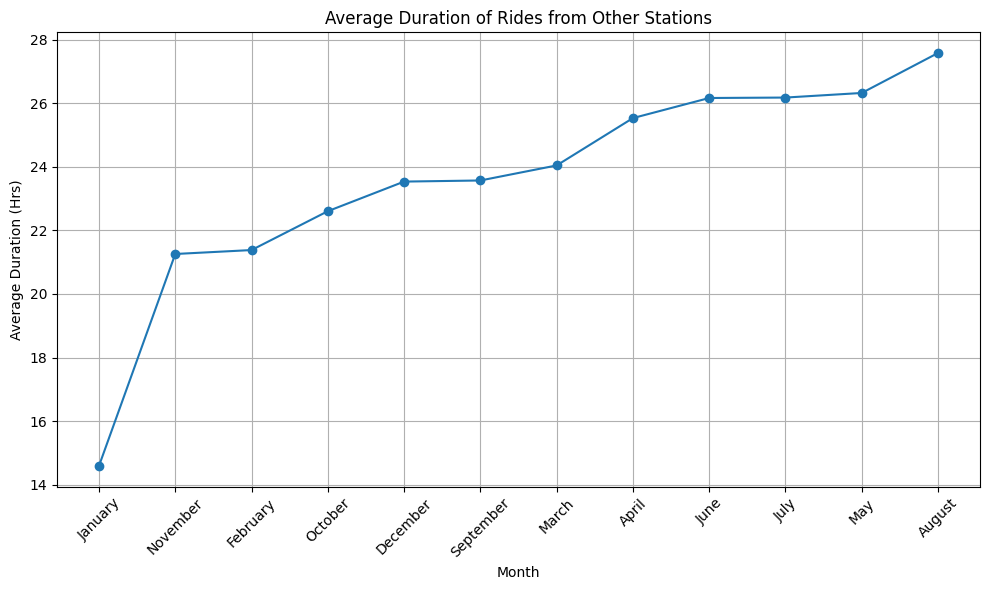

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, split, col
import matplotlib.pyplot as plt

# Create SparkSession
spark = SparkSession.builder \
    .appName("Bike Rental Analysis") \
    .getOrCreate()


# Split 'Month' column into month and year columns
others_dur_df = other_stations.withColumn('Month', split(col('Month'), ' ').getItem(0))

# Calculate average duration for bike rides
others_average_duration_df = others_dur_df.groupBy('Month').agg(avg('Duration(Hrs)').alias('Average Duration (Hrs)'))

# Sort months in ascending order
others_average_duration_df = others_average_duration_df.orderBy('Average Duration (Hrs)')

# Show the results with sorting
others_average_duration_df.show()

# Count of total rows
total_rows = others_dur_df.count()
print("\nCount of Total Rows:", total_rows)

# Show the results
others_dur_df.show()

# Descriptive statistics
print("\nDescriptive Statistics:")
others_dur_df.describe().show()

# Convert Spark DataFrame to Pandas DataFrame for plotting
others_pd_df = others_average_duration_df.toPandas()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(others_pd_df['Month'], others_pd_df['Average Duration (Hrs)'], marker='o')
plt.title('Average Duration of Rides from Other Stations')
plt.xlabel('Month')
plt.ylabel('Average Duration (Hrs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# # MONTHLY MEAN DURATION - BAYLIS ROAD, WATERLOO STATIONS

+---------+----------------------+
|    Month|Average Duration (Hrs)|
+---------+----------------------+
|  January|    11.660818713450292|
| December|     14.19502353732347|
|  October|    14.657021276595744|
|    April|     14.69334619093539|
|    March|    14.911145351823318|
|   August|    17.163609135155372|
| November|    17.482364629905614|
|      May|    17.515644555694617|
| February|    17.825330549756437|
|     June|    18.510265024262786|
|September|     20.79899135446686|
|     July|    21.434869075240304|
+---------+----------------------+


Count of Total Rows: 25703
+--------------------+-------------+-----+----+
|   StartStation Name|Duration(Hrs)|Month|Year|
+--------------------+-------------+-----+----+
|Baylis Road, Wate...|         10.0| June|2014|
|Baylis Road, Wate...|          9.0| June|2014|
|Baylis Road, Wate...|         10.0| June|2014|
|Baylis Road, Wate...|         12.0| July|2014|
|Baylis Road, Wate...|         10.0| July|2014|
|Baylis Road, Wate...|     

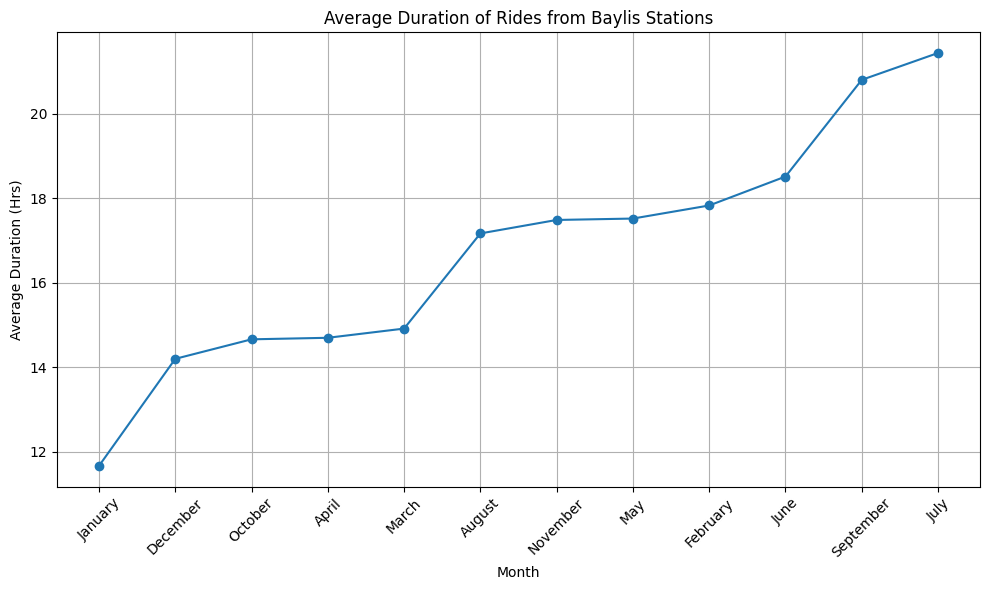

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, split, col

# Create SparkSession
spark = SparkSession.builder \
    .appName("Bike Rental Analysis") \
    .getOrCreate()

# Assuming df_bike1 is your DataFrame

# Filter for 'Baylis Road, Waterloo' in the 'StartStation Name' schema
#baylis_df = baylis_station.filter(baylis_station['StartStation Name'] == 'Baylis Road, Waterloo')

# Split 'Month' column into month and year columns
baylis_dur_df = baylis_station.withColumn('Month', split(col('Month'), ' ').getItem(0))

# Calculate average duration for bike rides
baylis_average_duration_df = baylis_dur_df.groupBy('Month').agg(avg('Duration(Hrs)').alias('Average Duration (Hrs)'))

# Sort months in ascending order
baylis_average_duration_df = baylis_average_duration_df.orderBy('Average Duration (Hrs)')

# Show the results with sorting
baylis_average_duration_df.show()

# Count of total rows
total_rows = baylis_dur_df.count()
print("\nCount of Total Rows:", total_rows)

# Show the results
baylis_dur_df.show()

# Descriptive statistics
print("\nDescriptive Statistics:")
baylis_dur_df.describe().show()


# Convert Spark DataFrame to Pandas DataFrame for plotting
baylis_pd_df = baylis_average_duration_df.toPandas()


# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(baylis_pd_df['Month'], baylis_pd_df['Average Duration (Hrs)'], marker='o')
plt.title('Average Duration of Rides from Baylis Stations')
plt.xlabel('Month')
plt.ylabel('Average Duration (Hrs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



# AVERAGE DURATION -BAYLIS AND OTHER STATIONS

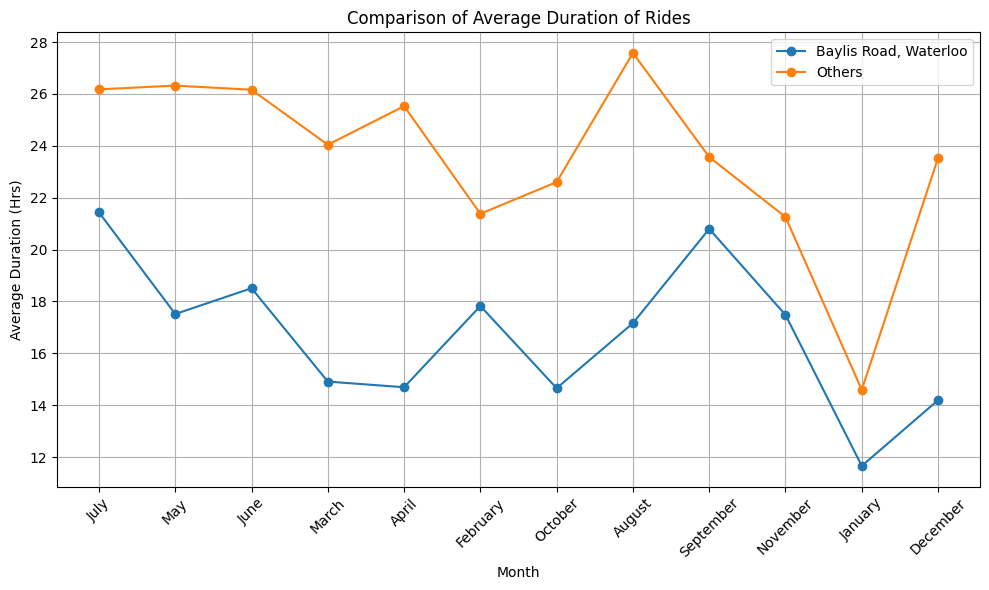

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, split, col
import matplotlib.pyplot as plt

# Create SparkSession
spark = SparkSession.builder \
    .appName("Bike Rental Analysis") \
    .getOrCreate()

# Calculate average duration for bike rides for both DataFrames
baylis_average_duration_df = baylis_dur_df.groupBy('Month').agg(avg('Duration(Hrs)').alias('Average Duration (Hrs) from Baylis'))
others_average_duration_df = others_dur_df.groupBy('Month').agg(avg('Duration(Hrs)').alias('Average Duration (Hrs) from Others'))

# Sort months in ascending order for both DataFrames
baylis_average_duration_df = baylis_average_duration_df.orderBy('Month')
others_average_duration_df = others_average_duration_df.orderBy('Month')

# Join DataFrames on 'Month' column
joined_dur_df = baylis_average_duration_df.join(others_average_duration_df, on=["Month"], how="inner")

# Convert Spark DataFrame to Pandas DataFrame for plotting
joined_pd_df = joined_dur_df.toPandas()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(joined_pd_df['Month'], joined_pd_df['Average Duration (Hrs) from Baylis'], marker='o', label='Baylis Road, Waterloo')
plt.plot(joined_pd_df['Month'], joined_pd_df['Average Duration (Hrs) from Others'], marker='o', label='Others')
plt.title('Comparison of Average Duration of Rides')
plt.xlabel('Month')
plt.ylabel('Average Duration (Hrs)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# HYPOTHESIS TESTING

# ASSUMPTIONS FOR T-TEST - INSPECTION

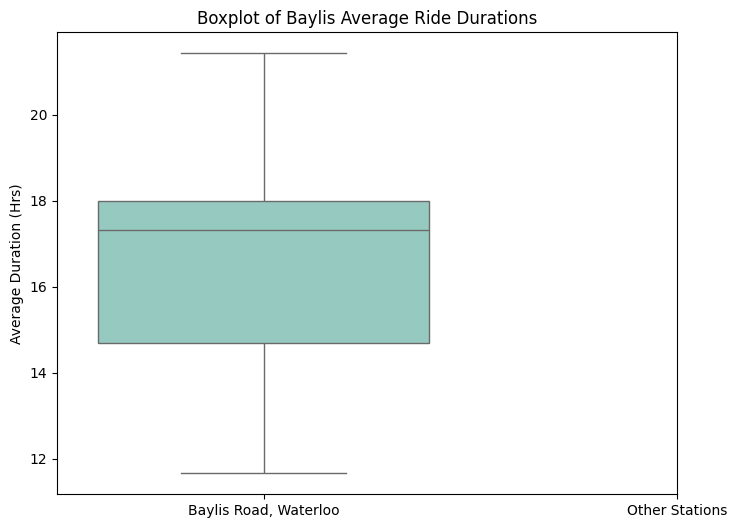


Interpretation:
1. Boxplot: If the data points do not show extreme outliers and the distributions are approximately symmetric, it supports normality.


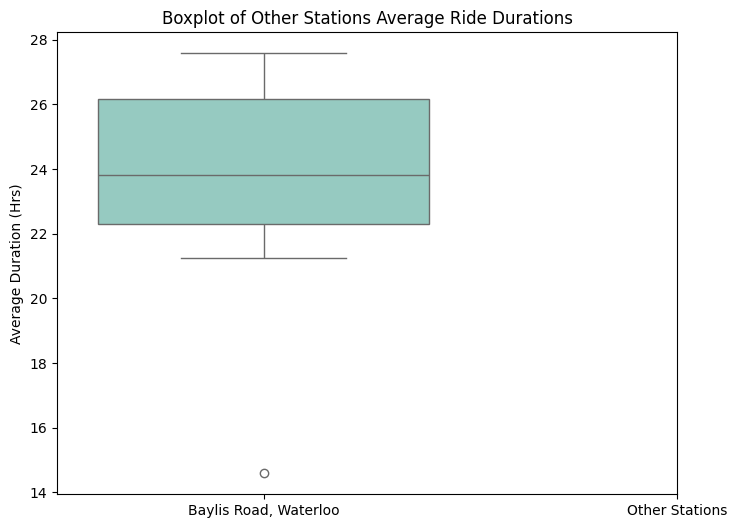


Interpretation:
1. Boxplot: If the data points do not show extreme outliers and the distributions are approximately symmetric, it supports normality.


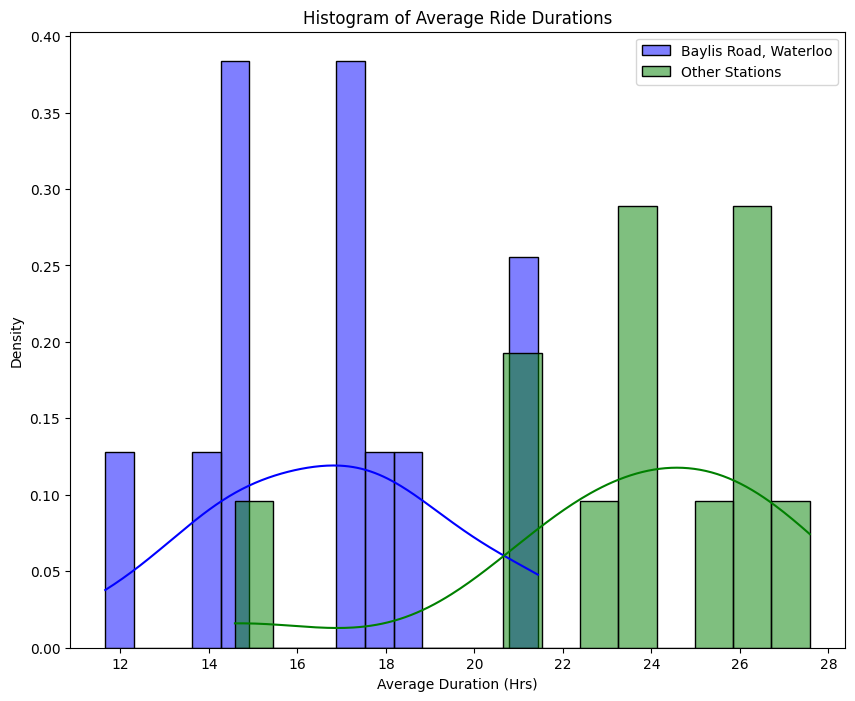


Interpretation:
 Histogram: If the KDE curve resembles a bell curve, it indicates normality.


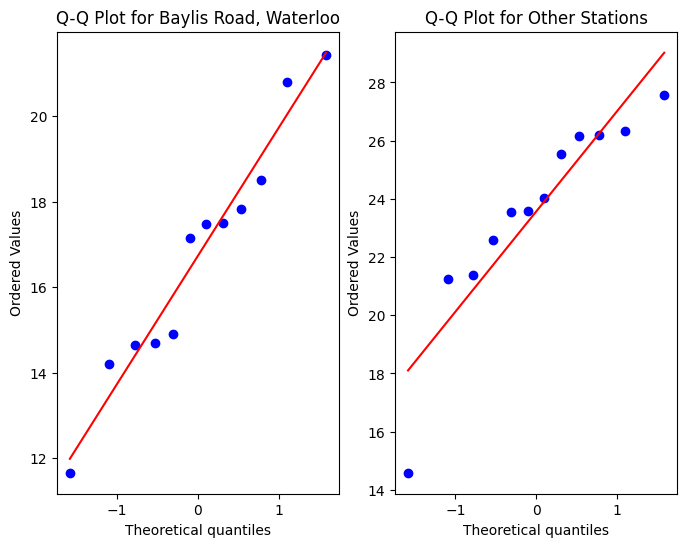


Interpretation:
 Q-Q Plot: If the points lie approximately on the line, it supports the assumption of normality.
Assumptions for T-Test:
1. The samples are independent.
2. The data follows a normal distribution.

Assumption 1: The samples are independent.
By design, the samples are collected independently. This assumption is generally satisfied if the data was collected in such a manner.

Assumption 2: The data follows a normal distribution.
Histograms and Q-Q plots are used to visually assess normality.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data from the table
baylis_data = {
    'Month': ['January', 'December', 'October', 'April', 'March', 'August', 'November', 'May', 'February', 'June', 'September', 'July'],
    'Average Duration (Hrs)': [11.66081871, 14.19502354, 14.65702128, 14.69334619, 14.91114535, 17.16360914, 17.48236463, 17.51564456, 17.82533055, 18.51026502, 20.79899135, 21.43486908]
}

others_data = {
    'Month': ['January', 'November', 'February', 'October', 'December', 'September', 'March', 'April', 'June', 'July', 'May', 'August'],
    'Average Duration (Hrs)': [14.5907706, 21.25669615, 21.38032456, 22.60268721, 23.53406172, 23.56885319, 24.04208302, 25.53130482, 26.1633266, 26.17729272, 26.32161732, 27.57944648]
}

# Create DataFrames
baylis_pd_df = pd.DataFrame(baylis_data)
others_pd_df = pd.DataFrame(others_data)

# Extract the 'Average Duration (Hrs)' columns
baylis_durations = baylis_pd_df['Average Duration (Hrs)']
others_durations = others_pd_df['Average Duration (Hrs)']


# Boxplot-Baylis
plt.figure(figsize=(8, 6))
sns.boxplot(data=[baylis_durations], palette="Set3")
plt.xticks([0, 1], ['Baylis Road, Waterloo', 'Other Stations'])
plt.title('Boxplot of Baylis Average Ride Durations')
plt.ylabel('Average Duration (Hrs)')
plt.show()
print("\nInterpretation:")
print("1. Boxplot: If the data points do not show extreme outliers and the distributions are approximately symmetric, it supports normality.")

# Boxplot-Others
plt.figure(figsize=(8, 6))
sns.boxplot(data=[ others_durations], palette="Set3")
plt.xticks([0, 1], ['Baylis Road, Waterloo', 'Other Stations'])
plt.title('Boxplot of Other Stations Average Ride Durations')
plt.ylabel('Average Duration (Hrs)')
plt.show()
print("\nInterpretation:")
print("1. Boxplot: If the data points do not show extreme outliers and the distributions are approximately symmetric, it supports normality.")




# Histogram
plt.figure(figsize=(10, 8))
sns.histplot(baylis_durations, kde=True, color='blue', label='Baylis Road, Waterloo', stat="density", bins=15)
sns.histplot(others_durations, kde=True, color='green', label='Other Stations', stat="density", bins=15)
plt.title('Histogram of Average Ride Durations')
plt.xlabel('Average Duration (Hrs)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Interpreting the plots:
print("\nInterpretation:")
print(" Histogram: If the KDE curve resembles a bell curve, it indicates normality.")




# Q-Q plot
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
stats.probplot(baylis_durations, dist="norm", plot=plt)
plt.title('Q-Q Plot for Baylis Road, Waterloo')

plt.subplot(1, 2, 2)
stats.probplot(others_durations, dist="norm", plot=plt)
plt.title('Q-Q Plot for Other Stations')

plt.show()

# Interpreting the plots:
print("\nInterpretation:")
print(" Q-Q Plot: If the points lie approximately on the line, it supports the assumption of normality.")


# Print Assumptions
print("Assumptions for T-Test:")
print("1. The samples are independent.")
print("2. The data follows a normal distribution.")

# Check independence (Assumption 1):
print("\nAssumption 1: The samples are independent.")
print("By design, the samples are collected independently. This assumption is generally satisfied if the data was collected in such a manner.")

# Check normality (Assumption 2) using visual inspection of Q-Q plots and histograms
print("\nAssumption 2: The data follows a normal distribution.")
print("Histograms and Q-Q plots are used to visually assess normality.")

# # Interpreting the plots:
# print("\nInterpretation:")
# print("1. Boxplot: If the data points do not show extreme outliers and the distributions are approximately symmetric, it supports normality.")
# print("2. Histogram: If the KDE curve resembles a bell curve, it indicates normality.")
# print("3. Q-Q Plot: If the points lie approximately on the line, it supports the assumption of normality.")

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
baylis_station = baylis_average_duration_df.toPandas()

# Convert Spark DataFrame to Pandas DataFrame for plotting
others_stations = others_average_duration_df.toPandas()

# # Convert Spark DataFrames to Pandas DataFrames
# baylis_pd_df = baylis_average_duration_df.toPandas()
# others_pd_df = others_average_duration_df.toPandas()

# Print the columns to verify they are correct
print("Baylis DataFrame Columns:", baylis_station.columns)
print("Others DataFrame Columns:", others_stations.columns)

Baylis DataFrame Columns: Index(['Month', 'Average Duration (Hrs) from Baylis'], dtype='object')
Others DataFrame Columns: Index(['Month', 'Average Duration (Hrs) from Others'], dtype='object')


In [ ]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
baylis_pd_df = baylis_average_duration_df.toPandas()

# Convert Spark DataFrame to Pandas DataFrame for plotting
others_pd_df = others_average_duration_df.toPandas()

# # Convert Spark DataFrames to Pandas DataFrames
# baylis_pd_df = baylis_average_duration_df.toPandas()
# others_pd_df = others_average_duration_df.toPandas()

# Print the columns to verify they are correct
print("Baylis DataFrame Columns:", baylis_pd_df.columns)
print("Others DataFrame Columns:", others_pd_df.columns)

Baylis DataFrame Columns: Index(['Month', 'Average Duration (Hrs) from Baylis'], dtype='object')
Others DataFrame Columns: Index(['Month', 'Average Duration (Hrs) from Others'], dtype='object')


# TWO SAMPLE T-TEST

Assumptions for T-Test:
1. The samples are independent.
2. The data follows a normal distribution.
3. The variances of the two populations are equal (homogeneity of variance).

T-Test Result:

T-Statistic: -5.271583317006969
P-Value: 2.7363455331568655e-05
Null hypothesis rejected. There is a significant difference in ride durations 
 between Baylis Road, Waterloo, and other stations in 2014.


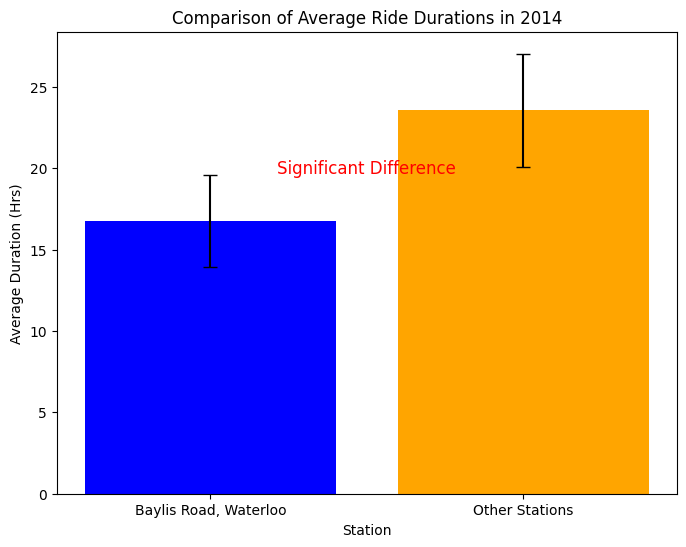


Accepted Hypothesis: There is a significant difference in ride durations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Convert joined_dur_df to Pandas DataFrame for easier computation
dur_pandas_df = joined_dur_df.toPandas()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(dur_pandas_df['Average Duration (Hrs) from Baylis'], dur_pandas_df['Average Duration (Hrs) from Others'])

# Determine significance level
alpha = 0.05

# Print assumptions
print("Assumptions for T-Test:")
print("1. The samples are independent.")
print("2. The data follows a normal distribution.")
print("3. The variances of the two populations are equal (homogeneity of variance).")

# Print results
print("\nT-Test Result:")
print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < alpha:
    print("Null hypothesis(H0) rejected. There is a significant difference in ride durations ")
    print(" between Baylis Road, Waterloo, and other stations in 2014.")
    accepted_hypothesis = "Alternative Hypothesis (H1): There is a significant difference in ride durations."
else:
    print("Failed to reject null hypothesis. There is no significant difference in ride durations  ")
    print(" between Baylis Road, Waterloo,and other stations in 2014.")
    accepted_hypothesis = "There is no significant difference in ride durations."

# Plot the result
plt.figure(figsize=(8, 6))

# Plot average durations
means = [dur_pandas_df['Average Duration (Hrs) from Baylis'].mean(), dur_pandas_df['Average Duration (Hrs) from Others'].mean()]
stds = [dur_pandas_df['Average Duration (Hrs) from Baylis'].std(), dur_pandas_df['Average Duration (Hrs) from Others'].std()]

plt.bar(['Baylis Road, Waterloo', 'Other Stations'],
        means,
        color=['blue', 'orange'],
        yerr=stds,
        capsize=5)

plt.xlabel('Station')
plt.ylabel('Average Duration (Hrs)')
plt.title('Comparison of Average Ride Durations in 2014')


# Add significance indicator
if p_value < alpha:
    plt.text(0.5, 20, 'Significant Difference', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')


plt.show()


print("\nAccepted Hypothesis:", accepted_hypothesis)

Assumptions for T-Test:
1. The samples are independent.
2. The data follows a normal distribution.
3. The variances of the two populations are equal (homogeneity of variance).

T-Statistic: -5.271583317006969
P-Value: 2.7363455331568655e-05
Null hypothesis rejected. There is a significant difference in ride durations between Baylis Road, Waterloo, and other stations in 2014.


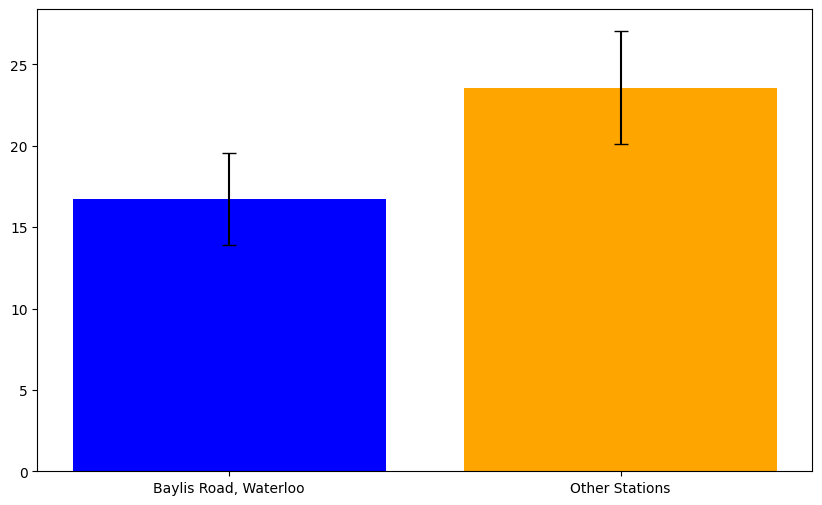


Accepted Hypothesis: There is a significant difference in ride durations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Convert joined_dur_df to Pandas DataFrame for easier computation
dur_pandas_df = joined_dur_df.toPandas()

# Extract relevant data for 2014 only
# Assuming 'Year' column exists and filtering by 2014
# rides_2014 = dur_pandas_df[dur_pandas_df['Year'] == 2014]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(dur_pandas_df['Average Duration (Hrs) from Baylis'], dur_pandas_df['Average Duration (Hrs) from Others'])

# Determine significance level
alpha = 0.05

# Print assumptions
print("Assumptions for T-Test:")
print("1. The samples are independent.")
print("2. The data follows a normal distribution.")
print("3. The variances of the two populations are equal (homogeneity of variance).")

# Print results
print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference in ride durations between Baylis Road, Waterloo, and other stations in 2014.")
    accepted_hypothesis = "There is a significant difference in ride durations."
else:
    print("Failed to reject null hypothesis. There is no significant difference in ride durations between Baylis Road, Waterloo, and other stations in 2014.")
    accepted_hypothesis = "There is no significant difference in ride durations."

# Plot the result
plt.figure(figsize=(10, 6))

# Plot average durations
plt.bar(['Baylis Road, Waterloo', 'Other Stations'],
        [dur_pandas_df['Average Duration (Hrs) from Baylis'].mean(), dur_pandas_df['Average Duration (Hrs) from Others'].mean()],
        color=['blue', 'orange'],
        yerr=[dur_pandas_df['Average Duration (Hrs) from Baylis'].std(), dur_pandas_df['Average Duration (Hrs) from Others'].std()],
        capsize=5)

# plt.xlabel('Station')
# plt.ylabel('Average Duration (Hrs)')
# plt.title('Comparison of Average Ride Durations in 2014')
# plt.annotate(f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}', xy=(0.5, max(dur_pandas_df['Average Duration (Hrs) from Baylis'].mean(), dur_pandas_df['Average Duration (Hrs) from Others'].mean())),
#              xytext=(0.5, max(dur_pandas_df['Average Duration (Hrs) from Baylis'].mean(), dur_pandas_df['Average Duration (Hrs) from Others'].mean()) + 2),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=12, ha='center')

plt.show()

print("\nAccepted Hypothesis:", accepted_hypothesis)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Convert joined_dur_df to Pandas DataFrame for easier computation
dur_pandas_df = joined_dur_df.toPandas()

# Extract relevant data for 2014 only
#rides_2014 = pandas_df[pandas_df['Year'] == 2014]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(dur_pandas_df['Average Duration (Hrs) from Baylis'], dur_pandas_df['Average Duration (Hrs) from Others'])

# Print assumptions
print("Assumptions for T-Test:")
print("1. The samples are independent.")
print("2. The data follows a normal distribution.")
print("3. The variances of the two populations are equal (homogeneity of variance).")

# Determine significance level
alpha = 0.05

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < alpha:
    print("Null hypothesis rejected. There is significant difference in ride durations between Baylis Road, Waterloo and other stations in 2014.")
else:
    print("Failed to reject null hypothesis. There is no significant difference in ride durations between Baylis Road, Waterloo and other stations in 2014.")

T-Statistic: -5.271583317006969
P-Value: 2.7363455331568655e-05
Null hypothesis rejected. There is significant difference in ride durations between Baylis Road, Waterloo and other stations in 2014.


T-Statistic: -5.271583317006969
P-Value: 2.7363455331568655e-05


<ipython-input-76-dbaac7f65dfb>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=dur_pandas_df[['Average Duration (Hrs) from Baylis', 'Average Duration (Hrs) from Others']], ci='sd')


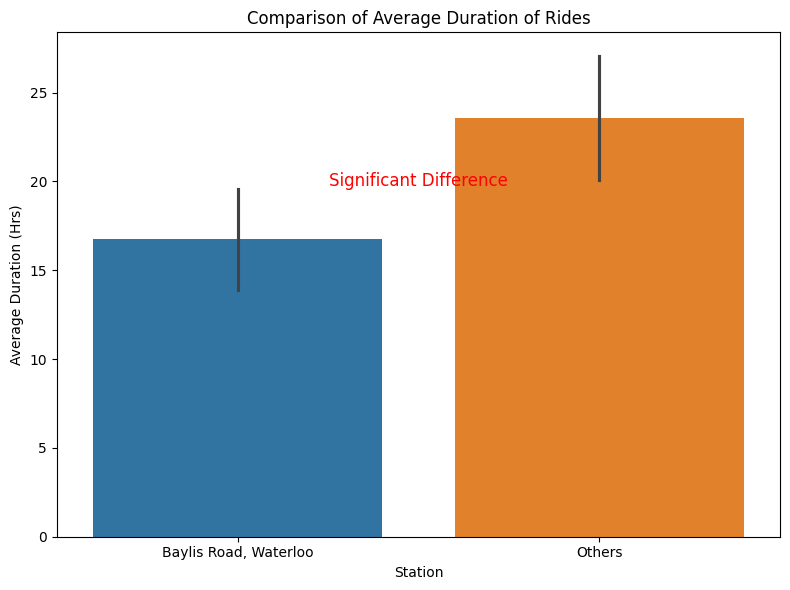

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Convert joined_dur_df to Pandas DataFrame for easier computation
dur_pandas_df = joined_dur_df.toPandas()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(dur_pandas_df['Average Duration (Hrs) from Baylis'], dur_pandas_df['Average Duration (Hrs) from Others'])

# Determine significance level
alpha = 0.05

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(data=dur_pandas_df[['Average Duration (Hrs) from Baylis', 'Average Duration (Hrs) from Others']], ci='sd')
plt.title('Comparison of Average Duration of Rides')
plt.xlabel('Station')
plt.ylabel('Average Duration (Hrs)')
plt.xticks(ticks=[0, 1], labels=['Baylis Road, Waterloo', 'Others'])
plt.tight_layout()

# Add significance indicator
if p_value < alpha:
    plt.text(0.5, 20, 'Significant Difference', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Show the plot
plt.show()

#Other DIscussions

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg

# Create a Spark session
spark = SparkSession.builder.appName("DataInfo").getOrCreate()


# Calculate count and average duration for each station
station_info = cleaned_bike_rides.groupBy("StartStation Name") \
    .agg(count("*").alias("Total Rides"), avg("Duration(Hrs)").alias("Average Duration (Hrs)"))

# Order the stations by total rides in descending order and select the top 20
top_20_stations = station_info.orderBy(col("Total Rides").asc()).limit(20)

# Show the top 20 stations
top_20_stations.show()

+--------------------+-----------+----------------------+
|   StartStation Name|Total Rides|Average Duration (Hrs)|
+--------------------+-----------+----------------------+
|Mechanical Worksh...|          1|                 252.0|
|           tabletop1|          2|                  12.5|
|Contact Centre, S...|          5|                  29.4|
|       Pop Up Dock 1|        562|    30.816725978647685|
|Limburg Road, Cla...|        705|     31.11063829787234|
|Santos Road, Wand...|        744|    27.323924731182796|
|Grant Road Centra...|        772|      39.7979274611399|
|Westfield Eastern...|        781|     36.53265044814341|
|Wandsworth Museum...|        890|    32.640449438202246|
|South Quay East, ...|       1012|     82.06620553359684|
|Manfred Road, Eas...|       1138|    26.991212653778557|
|Teviot Street, Po...|       1171|    39.953885567890694|
|Thornfield House,...|       1210|     49.43636363636364|
|Malmesbury Road, Bow|       1311|    41.990083905415716|
|Aberfeldy Str

# #**END**